<a href="https://colab.research.google.com/github/GitAnsh1ka/Greenhouse-Gas-Emission-Edunet-/blob/main/Greenhouse_Gas_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
 from google.colab import files
 upload = files.upload()

Saving SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv to SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary (1).csv


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv')
df


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,HS,Housing,other GHGs,"kg CO2e/2018 USD, purchaser price",0.001,0.000,0.001,NaN,4,2,1,5,1
260,ORE,Other real estate,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.000,0.414,NaN,3,2,1,3,1
261,ORE,Other real estate,methane,"kg/2018 USD, purchaser price",0.001,0.000,0.001,NaN,3,2,1,1,1
262,ORE,Other real estate,nitrous oxide,"kg/2018 USD, purchaser price",0,0.000,0.000,NaN,3,2,1,3,1


In [62]:
# Check for null values
print(df.isnull().sum())

Industry Code                                               0
Industry Name                                               0
Substance                                                   0
Unit                                                        0
Supply Chain Emission Factors without Margins               0
Margins of Supply Chain Emission Factors                    0
Supply Chain Emission Factors with Margins                  0
Unnamed: 7                                                264
DQ ReliabilityScore of Factors without Margins              0
DQ TemporalCorrelation of Factors without Margins           0
DQ GeographicalCorrelation of Factors without Margins       0
DQ TechnologicalCorrelation of Factors without Margins      0
DQ DataCollection of Factors without Margins                0
dtype: int64


In [63]:
print(df['Unnamed: 7'].unique())


[nan]


In [64]:
df.drop(columns=['Unnamed: 7'], inplace=True)


/tmp/ipython-input-65-96343005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


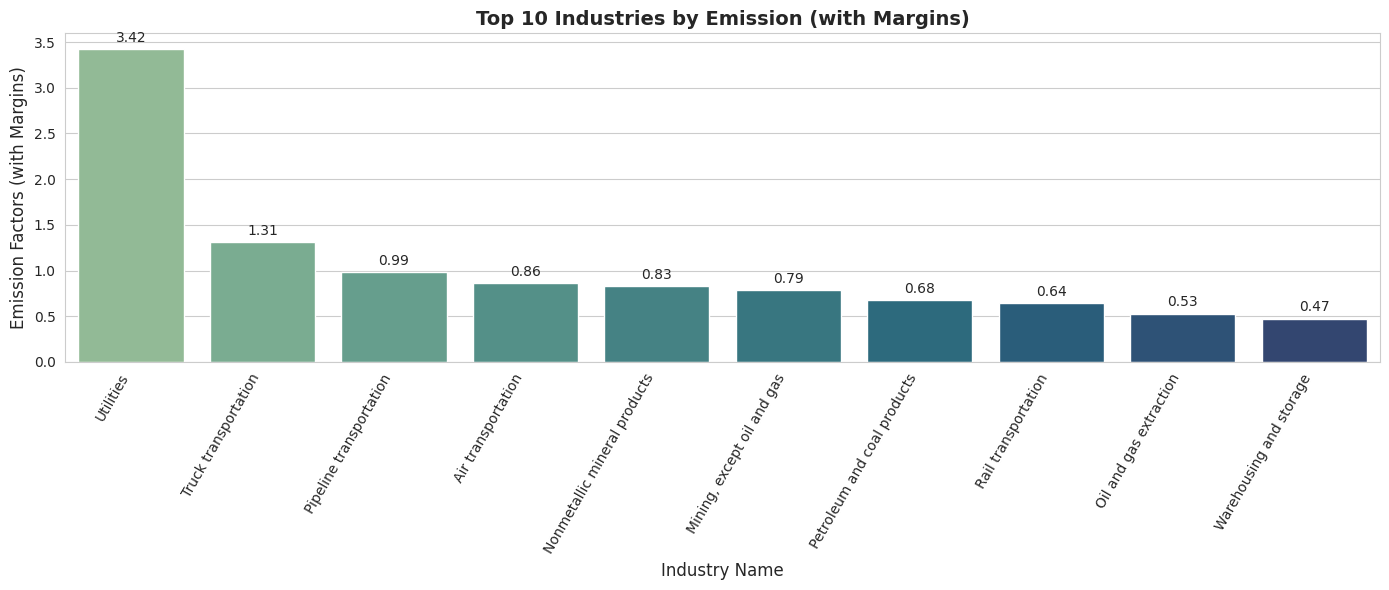

In [65]:
#Top 10 Industries By Emission

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Industry Name',
    y='Supply Chain Emission Factors with Margins',
    data=top10_industries,
    palette='crest'
)

plt.title('Top 10 Industries by Emission (with Margins)', fontsize=14, weight='bold')
plt.xlabel('Industry Name', fontsize=12)
plt.ylabel('Emission Factors (with Margins)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=60, ha='right')


for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()



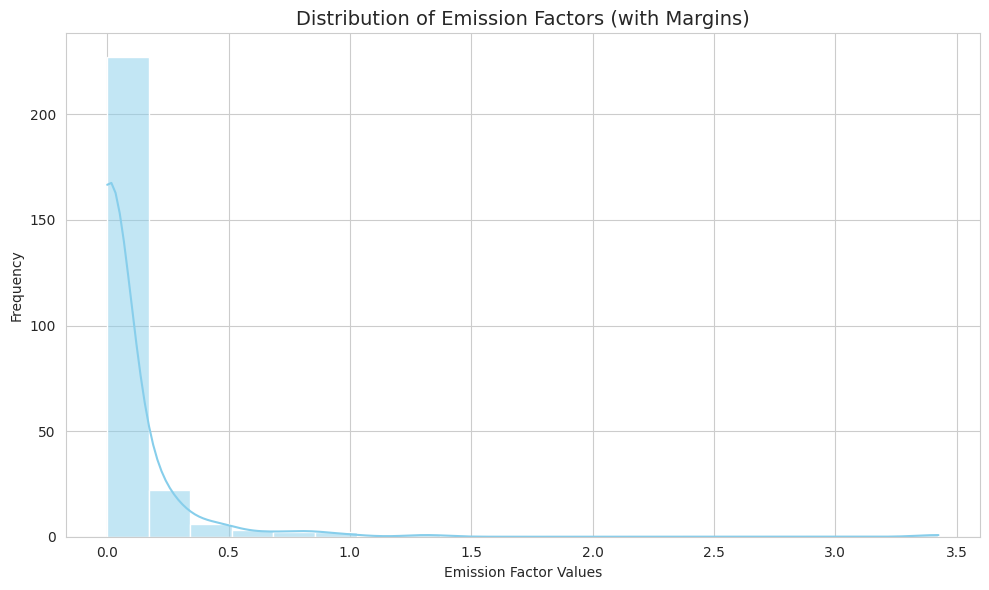

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Emission Factors (with Margins)', fontsize=14)
plt.xlabel('Emission Factor Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


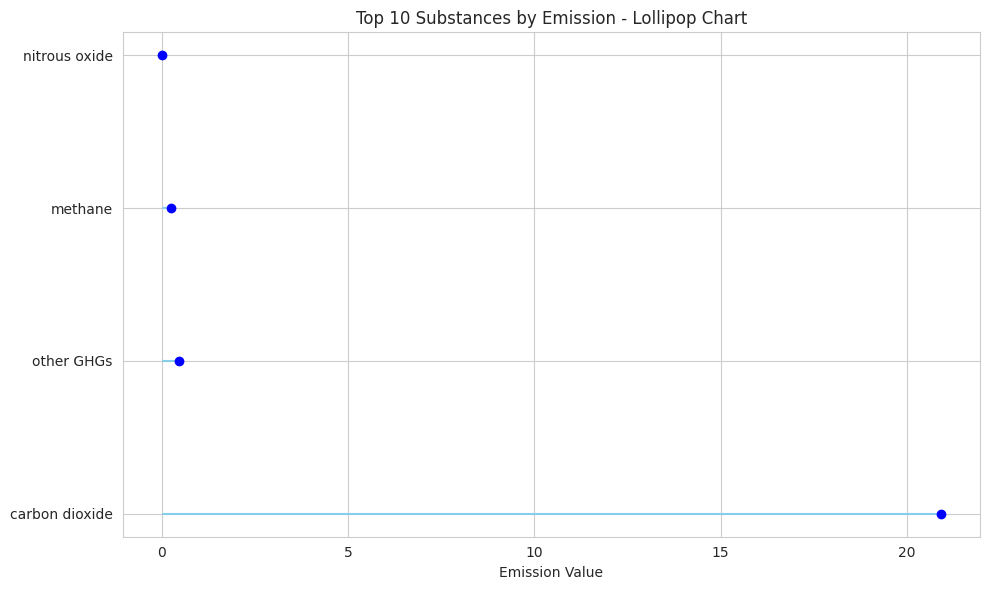

In [77]:
import matplotlib.pyplot as plt

top_substances = df.groupby('Substance')['Supply Chain Emission Factors with Margins'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_substances.index, xmin=0, xmax=top_substances.values, color='skyblue')
plt.plot(top_substances.values, top_substances.index, "o", color='blue')
plt.xlabel("Emission Value")
plt.title("Top 10 Substances by Emission - Lollipop Chart")
plt.tight_layout()
plt.show()
